# Interval

In these examples we will explore the interval embedding. 

In [1]:
import numpy as np
import matplotlib.pylab as plt

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from wildboar.datasets import load_dataset
from wildboar.embed import IntervalEmbedding
from wildboar.utils.plot import plot_time_domain

random_state = 1234

First, we load a dataset.

In [2]:
x, y = load_dataset("CBF")

Next, we define an interval embedding with a fixed non-overlapping amount of intervals, where each interval is summarized as its mean, variance and slope.

In [3]:

fixed = IntervalEmbedding(n_intervals=30, summarizer="auto", intervals="fixed")

We fit and transform the time series and extract the start index for each interval.

In [4]:
x_t = fixed.fit_transform(x)
labels = ["%s" % start for (dim, (start, length, _)) in fixed.embedding_.features]
n_features = x_t.shape[1]


Finally, we plot the time series and the mean, variance and slope respectivley.

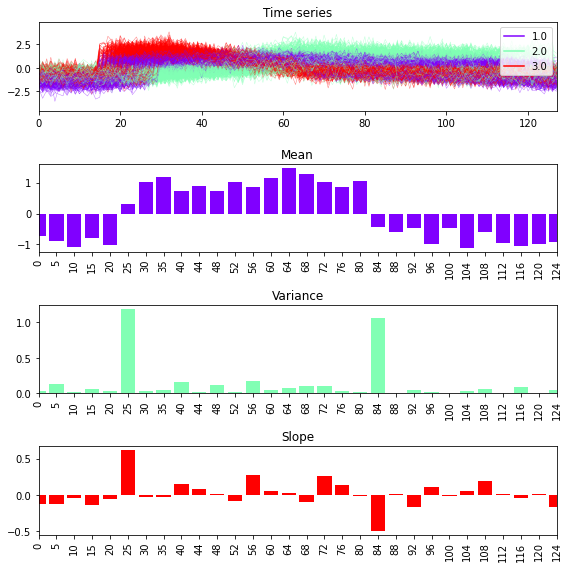

In [5]:
fig, ax = plt.subplots(nrows=4, figsize=(8, 8))

plot_time_domain(x, y=y, ax=ax[0], cmap="rainbow")
ax[0].title.set_text("Time series")
colors = plt.cm.rainbow(np.linspace(0, 1, 3))
titles = ["Mean", "Variance", "Slope"]
for i in range(3):
    ax[i + 1].bar(labels, x_t[0, i:n_features:3], color=colors[i, :])
    plt.setp(ax[i + 1].get_xticklabels(), rotation="vertical", ha="center")
    ax[i + 1].title.set_text(titles[i])
    ax[i + 1].set_xlim([0, 29])

plt.tight_layout()


In [6]:
def plot(p, var, labels, index):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(p[:, 0], p[:, 1], p[:, 2], color=colors[index, :])
    ax.set_xlabel("Component 1 (%.2f variance explained)" % var[0])
    ax.set_ylabel("Component 2 (%.2f variance explained)" % var[1])
    ax.set_zlabel("Component 3 (%.2f variance explained)" % var[2])

In [7]:
labels, index = np.unique(y, return_inverse=True)

Similar to the other embeddings we use principal component analysis to explore the resulting embedding.

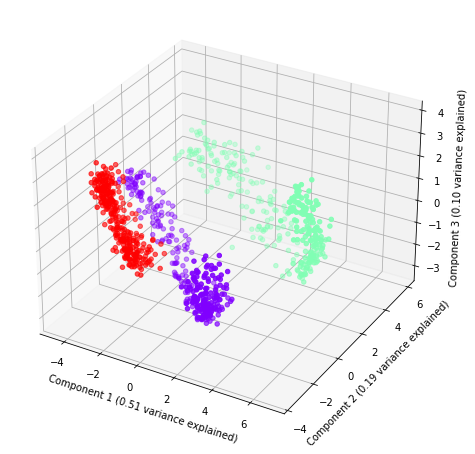

In [8]:
ie = make_pipeline(
    IntervalEmbedding(
        n_intervals=100,
        summarizer="auto",
        intervals="random",
        random_state=random_state,
        n_jobs=-1,
    ),
    PCA(n_components=3, random_state=random_state),
)
plot(ie.fit_transform(x), ie.steps[1][1].explained_variance_ratio_, labels, index)